In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
#EDA
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
df = pd.get_dummies(df,drop_first= True)

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
X = df.loc[:,['Age','Pregnancies','Glucose']].values
y = df.loc[:,['Outcome']].values

In [13]:
X

array([[ 50,   6, 148],
       [ 31,   1,  85],
       [ 32,   8, 183],
       ...,
       [ 30,   5, 121],
       [ 47,   1, 126],
       [ 23,   1,  93]])

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [15]:
X

array([[ 1.4259954 ,  0.63994726,  0.84832379],
       [-0.19067191, -0.84488505, -1.12339636],
       [-0.10558415,  1.23388019,  1.94372388],
       ...,
       [-0.27575966,  0.3429808 ,  0.00330087],
       [ 1.17073215, -0.84488505,  0.1597866 ],
       [-0.87137393, -0.84488505, -0.8730192 ]])

In [16]:
y = y.reshape(-1)

In [18]:
y.shape

(768,)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0, test_size = 0.25)

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
acc_list = []
err_list = []
for i in range(1,25):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    print("For k = {}, accuracy = {}".format(i,acc))
    acc_list.append(acc)
    err_list.append(1-acc)

For k = 1, accuracy = 0.734375
For k = 2, accuracy = 0.7291666666666666
For k = 3, accuracy = 0.7552083333333334
For k = 4, accuracy = 0.7552083333333334
For k = 5, accuracy = 0.75
For k = 6, accuracy = 0.75
For k = 7, accuracy = 0.734375
For k = 8, accuracy = 0.75
For k = 9, accuracy = 0.7395833333333334
For k = 10, accuracy = 0.7447916666666666
For k = 11, accuracy = 0.7604166666666666
For k = 12, accuracy = 0.7604166666666666
For k = 13, accuracy = 0.7604166666666666
For k = 14, accuracy = 0.7604166666666666
For k = 15, accuracy = 0.7708333333333334
For k = 16, accuracy = 0.765625
For k = 17, accuracy = 0.7552083333333334
For k = 18, accuracy = 0.765625
For k = 19, accuracy = 0.765625
For k = 20, accuracy = 0.7708333333333334
For k = 21, accuracy = 0.765625
For k = 22, accuracy = 0.765625
For k = 23, accuracy = 0.7708333333333334
For k = 24, accuracy = 0.7604166666666666


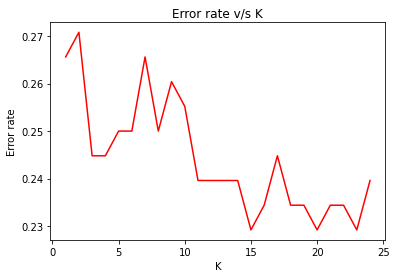

In [25]:
plt.plot(list(range(1,25)),err_list,c= 'r')
plt.title('Error rate v/s K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()